In [1]:
import glacierml as gl
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
df, ref = gl.load_notebook_data()

glac = gl.load_training_data(
    RGI_input = 'y',
    data_version = 'v1'
)

data = pd.merge(df, glac, on = 'RGIId', how = 'outer')
data = pd.merge(data, ref, on = 'RGIId', how = 'outer')
data = data.dropna()
data

Global Volume: 101.22, UB: 39.16, LB: 42.34, STD: 42.19
# of raw thicknesses: 498
# of raw thickness matched to RGI = 497, 444 unique


,Unnamed: 0_x,RGIId,Weighted Mean Thickness_x,Mean Thickness,Median Thickness_x,Thickness Std Dev_x,Shapiro-Wilk statistic_x,Shapiro-Wilk p_value_x,IQR_x,Lower Bound_x,Upper Bound_x,Median Value_x,Total estimates_x,region_x_x,CenLat_x,CenLon_x,Slope_x,Zmin_x,Zmed_x,Zmax_x,Area_x,Aspect_x,Lmax_x,Zdelta_x,UB_x,LB_x,Edasi Volume_x,Volume Std Dev_x,CenLat_y,CenLon_y,Area_y,Zmin_y,Zmed_y,Zmax_y,Slope_y,Aspect_y,Lmax_y,Thickness,region_y_x,index_x,index_y,Centroid Distance,Farinotti Mean Thickness,region_x_y,Unnamed: 0_y,Weighted Mean Thickness_y,Edasi Mean Thickness,Median Thickness_y,Thickness Std Dev_y,Shapiro-Wilk statistic_y,Shapiro-Wilk p_value_y,IQR_y,Lower Bound_y,Upper Bound_y,Median Value_y,Total estimates_y,region_y_y,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,Zdelta_y,UB_y,LB_y,Edasi Volume_y,Volume Std Dev_y,Farinotti Volume,region,VE / VF
36,36.0,RGI60-01.00037,165.569889,165.589315,166.046430,20.382341,0.977804,5.939409e-24,24.636735,17.696263,18.747401,166.046430,3811.0,01,63.469173,-146.528168,12.0,722.0,1841.0,3081.0,234.583,30.0,41911.0,2359.0,4.397821,4.151243,38.839881,4.781351,63.469173,-146.528168,234.583,722.0,1841.0,3081.0,12.0,30.0,41911.0,235.0,01,36.0,201.0,1.851481,213.117260,01,36.0,165.569889,165.589315,166.046430,20.382341,0.977804,5.939409e-24,24.636735,147.893052,-146.841914,166.046430,3811.0,01,63.469173,-146.528168,12.0,722.0,1841.0,3081.0,234.583,30.0,41911.0,2359.0,-34.446617,34.693196,38.844438,4.781351,49.993686,01,0.776987
1103,1103.0,RGI60-01.01104,81.131648,81.079888,81.399414,10.433124,0.994151,2.776715e-11,13.579535,10.294491,10.070715,81.399414,3811.0,01,58.380000,-134.349000,10.0,676.0,1123.0,1494.0,9.528,327.0,6332.0,818.0,0.095954,0.098086,0.773022,0.099407,58.380000,-134.349000,9.528,676.0,1123.0,1494.0,10.0,327.0,6332.0,66.0,01,1103.0,33.0,0.643556,133.515720,01,1103.0,81.131648,81.079888,81.399414,10.433124,0.994151,2.776715e-11,13.579535,70.785397,-71.009173,81.399414,3811.0,01,58.380000,-134.349000,10.0,676.0,1123.0,1494.0,9.528,327.0,6332.0,818.0,-0.676575,0.674443,0.772529,0.099407,1.272138,01,0.607268
2235,2235.0,RGI60-01.02236,20.441265,20.441688,20.158743,5.413321,0.959235,1.921387e-31,6.320782,4.857410,4.467055,20.158743,3811.0,01,69.276000,-143.819000,22.0,2360.0,2440.0,2554.0,0.153,219.0,680.0,194.0,0.000683,0.000743,0.003128,0.000828,69.276000,-143.819000,0.153,2360.0,2440.0,2554.0,22.0,219.0,680.0,82.0,01,2235.0,231.0,0.622846,22.802404,01,2235.0,20.441265,20.441688,20.158743,5.413321,0.959235,1.921387e-31,6.320782,15.584278,-15.974634,20.158743,3811.0,01,69.276000,-143.819000,22.0,2360.0,2440.0,2554.0,0.153,219.0,680.0,194.0,-0.002444,0.002384,0.003128,0.000828,0.003489,01,0.896471
10674,10674.0,RGI60-01.10679,25.299620,25.329500,24.506273,9.943259,0.898534,1.121039e-44,9.769386,7.998610,7.133909,24.506273,3811.0,01,61.107000,-147.007000,26.0,619.0,661.0,720.0,0.041,57.0,-9.0,101.0,0.000292,0.000328,0.001037,0.000408,61.107000,-147.007000,0.041,619.0,661.0,720.0,26.0,57.0,-9.0,277.0,01,10674.0,200.0,5.549550,11.747563,01,10674.0,25.299620,25.329500,24.506273,9.943259,0.898534,1.121039e-44,9.769386,17.330890,-18.195591,24.506273,3811.0,01,61.107000,-147.007000,26.0,619.0,661.0,720.0,0.041,57.0,-9.0,101.0,-0.000746,0.000711,0.001039,0.000408,0.000482,01,2.156149
14440,14440.0,RGI60-01.14445,28.200127,28.202849,27.377172,5.956496,0.935115,6.755543e-38,6.667386,5.231440,4.983356,27.377172,3811.0,01,60.025000,-139.284000,23.0,1158.0,1447.0,1818.0,0.880,193.0,1561.0,660.0,0.004385,0.004604,0.024816,0.005242,60.025000,-139.284000,0.880,1158.0,1447.0,1818.0,23.0,193.0,1561.0,270.0,01,14440.0,249.0,3.991036,35.568916,01,14440.0,28.200127,28.202849,27.377172,5.956496,0.935115,6.755543e-38,6.667386,22.971409,-23.219493,27.377172,3811.0,01,60.025000,-139.284000,23.0,1158.0,1447.0,1818.0,0.880,193.0,1561.0,660.0,-0.020433,0.020215,0.024819,0.005242,0.031301,01,0.792907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# Density plot of E&L vs GlaThiDa mean thickness

In [3]:
from scipy.stats import gaussian_kde

data_1 = data['Mean Thickness']
data_2 = data['Farinotti Mean Thickness']
data_3 = data['Thickness']


# data_1 = ref['Farinotti Mean Thickness'] / 1e3 * ref['Area']
# data_2 = ref['Edasi Mean Thickness'] / 1e3 * ref['Area']

print('Sorting data...')
x_1 = np.sort(data_1)
y_1 = 1. * np.arange(len(data_1)) / (len(data_1) - 1)

x_2 = np.sort(data_2)
y_2 = 1. * np.arange(len(data_2)) / (len(data_2) - 1)

x_3 = np.sort(data_3)
y_3 = 1. * np.arange(len(data_3)) / (len(data_3) - 1)

print('Calculating point density...')
# Calculate the point density
xy = np.vstack([np.log10(data_1),np.log10(data_3)])

z_1 = gaussian_kde(xy)(xy)

yz = np.vstack([np.log10(data_2),np.log10(data_3)])

z_2 = gaussian_kde(yz)(yz)

Sorting data...
Calculating point density...


Text(0.5, 0.95, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nIce Thickness Estimates VS. GlaThiDa Measurements')

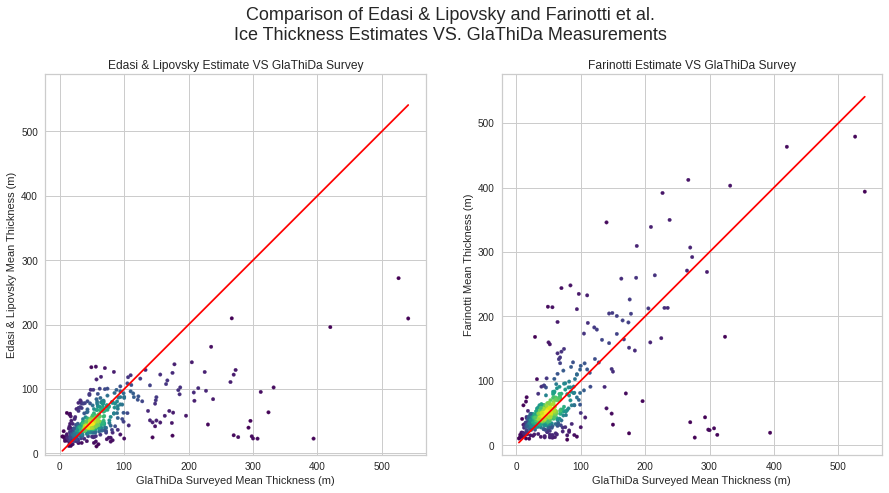

In [4]:
fig = plt.subplots(figsize = (15,8))
plt.subplot(1,2,1)
plt.scatter(
    data_3,
    data_1,
    marker = '.',
    c = (z_1),
    cmap = 'viridis'
)
plt.axis('square')

plt.plot(
    (data['Thickness'].min(), data['Thickness'].max()),
    (data['Thickness'].min(), data['Thickness'].max()),
    color = 'red',
    linestyle = '-'
)
plt.title('Edasi & Lipovsky Estimate VS GlaThiDa Survey')
plt.ylabel('Edasi & Lipovsky Mean Thickness (m)')
plt.xlabel('GlaThiDa Surveyed Mean Thickness (m)')

plt.subplot(1,2,2)
plt.scatter(
    data_3,
    data_2,
    marker = '.',
    c = (z_2),
    cmap = 'viridis'
)
plt.axis('square')
plt.plot(
    (data['Thickness'].min(), data['Thickness'].max()),
    (data['Thickness'].min(), data['Thickness'].max()),
    color = 'red',
    linestyle = '-'
)
plt.title('Farinotti Estimate VS GlaThiDa Survey')
plt.ylabel('Farinotti Mean Thickness (m)')
plt.xlabel('GlaThiDa Surveyed Mean Thickness (m)')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nIce Thickness Estimates VS. GlaThiDa Measurements', y = .95, fontsize = 18
)

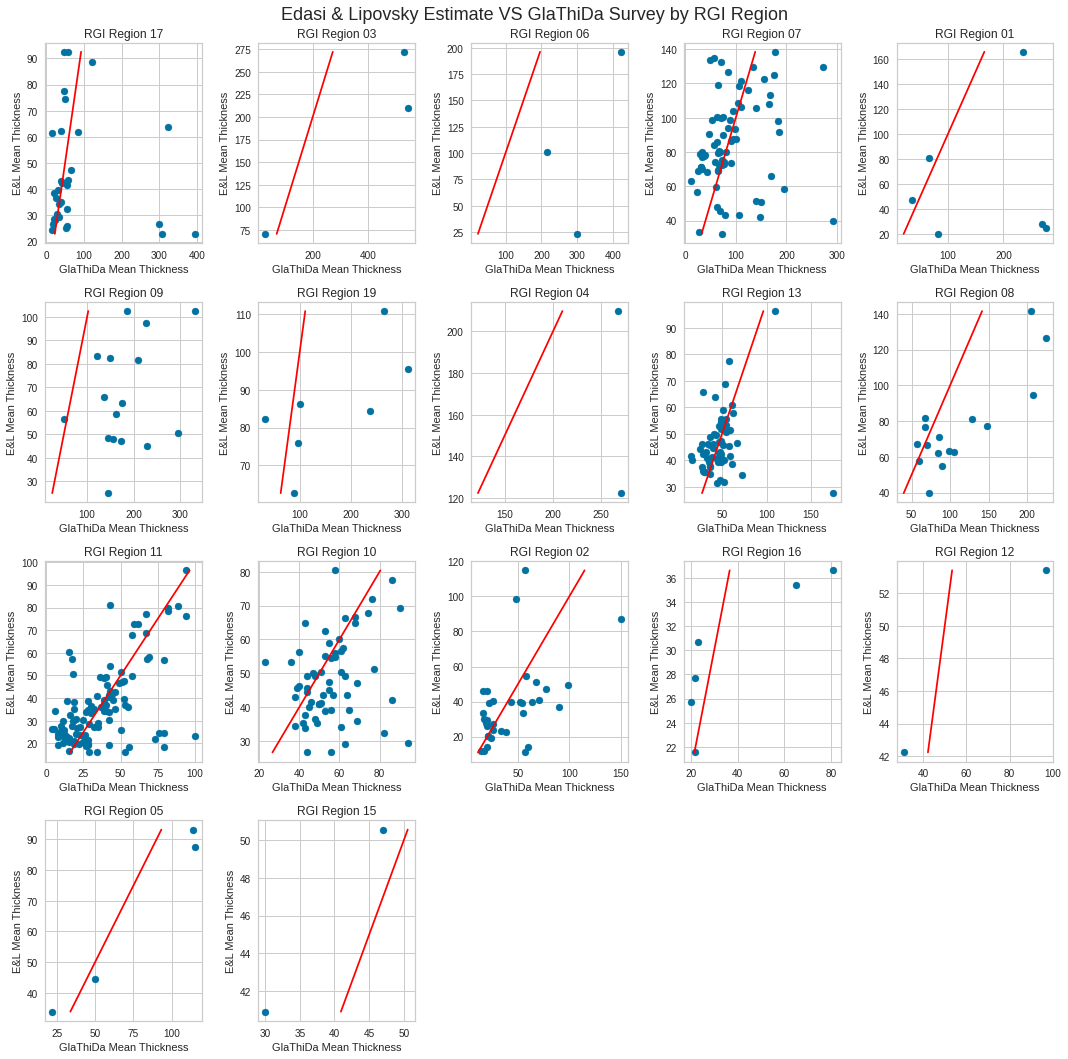

In [34]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
for n, reg in enumerate(data['region'].unique()):
    dft = data[data['region'] == reg]
    data_1 = dft['Mean Thickness'],
    data_2 = dft['Thickness']
    ax = plt.subplot(4,5,n+1)
    ax.set_xlabel('GlaThiDa Mean Thickness')
    ax.set_ylabel('E&L Mean Thickness')
    ax.set_title('RGI Region ' + reg)
    plt.scatter(
        data_2,
        data_1,
#         marker = '.',
#         c = (z),
#         cmap = 'viridis'
    )
    # plt.axis('square')
    plt.plot(
        (dft['Mean Thickness'].min(), dft['Mean Thickness'].max()),
        (dft['Mean Thickness'].min(), dft['Mean Thickness'].max()),
        color = 'red',
        linestyle = '-'
    )
plt.suptitle('Edasi & Lipovsky Estimate VS GlaThiDa Survey by RGI Region', fontsize = 18)
plt.tight_layout()

# Do these terrible underestimated glaciers have anything in common?

In [113]:
data['Farinotti Residual'] = abs(data['Farinotti Mean Thickness'] - data['Thickness'])
data = data.sort_values('Farinotti Residual', ascending = False)

In [114]:
feature_list = [
    'Farinotti Mean Thickness', 'Thickness', 'Area_x', 'Slope_x', 
    'Lmax_x', 'Zmed_x', 'Zmax_x'
]

In [115]:
def rsf(rank = 'top', stat = 'mean'):
    

    residuals = []
    for feature in feature_list:
        if rank == 'top':
            if stat == 'mean':
                statistic = str(np.round(data[feature].head(111).mean(),2))
            if stat =='median':
                statistic = str(np.round(data[feature].head(111).median(),2))
            if stat == 'std':
                statistic = str(np.round(data[feature].head(111).std(),2))
        if rank == 'bot':
            if stat == 'mean':
                statistic = str(np.round(data[feature].tail(111).mean(),2))
            if stat =='median':
                statistic = str(np.round(data[feature].tail(111).median(),2))
            if stat == 'std':
                statistic = str(np.round(data[feature].tail(111).std(),2))
        residuals.append(statistic)
    return residuals

In [116]:
# feature_list.insert(0, 'Weighted Mean Thickness_x')
residual_stats_f = pd.DataFrame(
{
    'Feature':[
        'Estimated Mean Thickness', 'GlaThiDa Mean Thickness',
        'Area (km^2)', 'Slope(deg)','Maximum Length (m)',
        'Median Elevation (m)', 'Maximum Elevation (m)'
    ],
    '25% highest residuals mean feature value':rsf(rank = 'top', stat = 'mean'),
    '25% lowest residuals mean feature value':rsf(rank = 'bot', stat = 'mean'),
    '25% highest residuals median feature value':rsf(rank = 'top', stat = 'median'),
    '25% lowest residual median feature value':rsf(rank = 'bot', stat = 'median'),
    '25% highest residual std feature value':rsf(rank = 'top', stat = 'std'),
    '25% lowest residual std feature value':rsf(rank = 'bot', stat = 'std'),
}
)
residual_stats_f

,Feature,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,Estimated Mean Thickness,122.84,47.85,90.84,40.49,113.81,35.6
1,GlaThiDa Mean Thickness,126.86,46.49,84.0,40.0,104.41,35.44
2,Area (km^2),130.85,4.22,5.31,1.32,411.38,13.95
3,Slope(deg),15.45,19.03,13.2,18.6,9.23,7.0
4,Maximum Length (m),9533.82,2635.75,3737.0,2054.0,14069.02,2750.71
5,Median Elevation (m),1421.1,3135.52,749.0,3111.0,1405.76,1079.31
6,Maximum Elevation (m),1750.25,3476.14,1026.0,3555.0,1354.53,1052.69


In [117]:
data['E&L Residual'] = abs(data['Weighted Mean Thickness_x'] - data['Thickness'])
data = data.sort_values('E&L Residual', ascending = False)
feature_list.remove('Farinotti Mean Thickness')
feature_list.insert(0, 'Weighted Mean Thickness_x')

In [118]:
residual_stats_e = pd.DataFrame(
{
    'Feature':[
        'Estimated Mean Thickness', 'GlaThiDa Mean Thickness',
        'Area (km^2)', 'Slope(deg)','Maximum Length (m)',
        'Median Elevation (m)', 'Maximum Elevation (m)'
    ],
    '25% highest residuals mean feature value':rsf(rank = 'top', stat = 'mean'),
    '25% lowest residuals mean feature value':rsf(rank = 'bot', stat = 'mean'),
    '25% highest residuals median feature value':rsf(rank = 'top', stat = 'median'),
    '25% lowest residual median feature value':rsf(rank = 'bot', stat = 'median'),
    '25% highest residual std feature value':rsf(rank = 'top', stat = 'std'),
    '25% lowest residual std feature value':rsf(rank = 'bot', stat = 'std'),
}
)
residual_stats_e

,Feature,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,Estimated Mean Thickness,74.91,47.22,68.98,43.24,45.38,20.4
1,GlaThiDa Mean Thickness,141.3,47.66,107.0,45.0,107.4,20.75
2,Area (km^2),139.33,5.28,6.6,2.02,411.15,16.17
3,Slope(deg),15.15,18.21,13.2,17.7,8.7,5.23
4,Maximum Length (m),10423.69,3149.48,4577.0,2472.0,14392.95,3309.28
5,Median Elevation (m),1409.55,2915.38,706.0,3079.0,1448.02,1076.35
6,Maximum Elevation (m),1776.78,3283.69,1026.0,3409.0,1486.25,1111.82


In [119]:
select = [x for x in residual_stats_f.columns if x != 'Feature']
df_f = residual_stats_f[select]
df_f

select = [x for x in residual_stats_e.columns if x != 'Feature']
df_e = residual_stats_e[select]
df_e

,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,74.91,47.22,68.98,43.24,45.38,20.4
1,141.3,47.66,107.0,45.0,107.4,20.75
2,139.33,5.28,6.6,2.02,411.15,16.17
3,15.15,18.21,13.2,17.7,8.7,5.23
4,10423.69,3149.48,4577.0,2472.0,14392.95,3309.28
5,1409.55,2915.38,706.0,3079.0,1448.02,1076.35
6,1776.78,3283.69,1026.0,3409.0,1486.25,1111.82


In [120]:
df_f

,25% highest residuals mean feature value,25% lowest residuals mean feature value,25% highest residuals median feature value,25% lowest residual median feature value,25% highest residual std feature value,25% lowest residual std feature value
0,122.84,47.85,90.84,40.49,113.81,35.6
1,126.86,46.49,84.0,40.0,104.41,35.44
2,130.85,4.22,5.31,1.32,411.38,13.95
3,15.45,19.03,13.2,18.6,9.23,7.0
4,9533.82,2635.75,3737.0,2054.0,14069.02,2750.71
5,1421.1,3135.52,749.0,3111.0,1405.76,1079.31
6,1750.25,3476.14,1026.0,3555.0,1354.53,1052.69


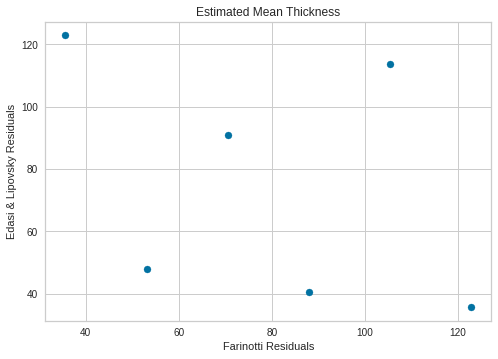

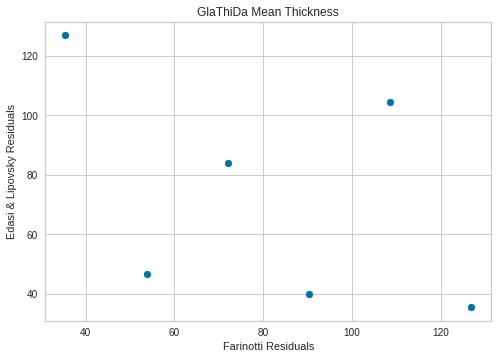

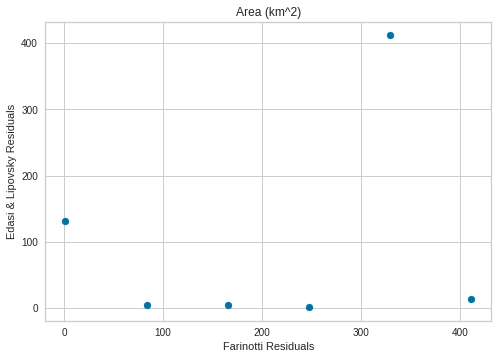

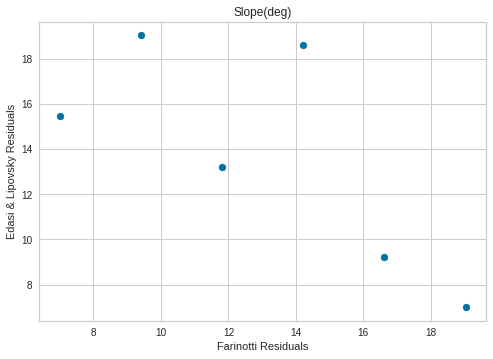

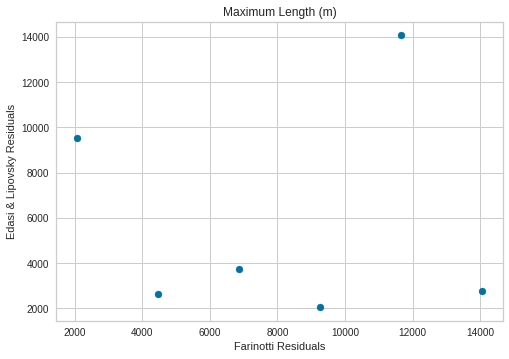

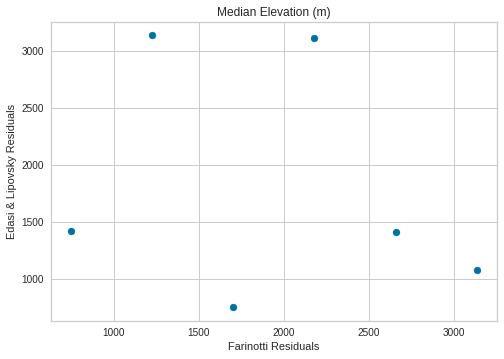

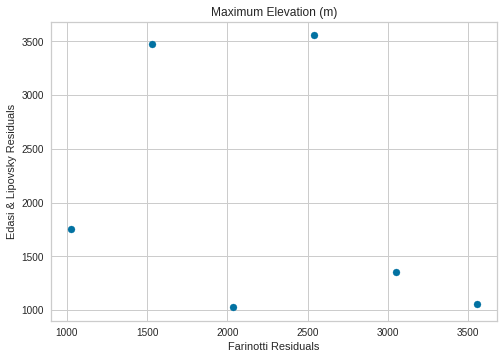

In [205]:
df_f = df_f.astype(float)
for row in range(0, 7, 1):
#     for col in list(df_f):
#         print(row)
#         print(col)
    y = pd.Series(df_f.loc[row,:].astype(float), name = col
#                   name = 'poop'
                 )

    x = np.linspace(df_f.loc[row,:].min(), df_f.loc[row,:].max(),
             len(df_f) - 1
             )
    z = residual_stats_e['Feature'].iloc[row]

    plt.scatter(
        x,
        y
    )
#         plt.text(x, y, col)
    plt.title(residual_stats_e.loc[row,'Feature'])
    plt.xlabel('Farinotti Residuals')
    plt.ylabel('Edasi & Lipovsky Residuals')
#     plt.xlim = (0, 2000)
#     plt.ylim = (0, 2000)
#     plt.xscale = ('log')
#     plt.yscale = ('log')
    plt.show()
    # plt.axis('square')

# Build regional statistics difference table

In [12]:
def find_residual_stat_diff(stat = 'length', region = '01', study = 'edasi'):
    
    df = data[data['region'] == region]
    
    if stat == 'mean':
        
        mean_e = df['Weighted Mean Thickness_x'].mean()
        mean_g = df['Thickness'].mean()
        mean_f = df['Farinotti Mean Thickness'].mean()
        statistic_e = mean_e - mean_g
        statistic_f = mean_f - mean_g
    
    if stat == 'median':
        median_e = df['Weighted Mean Thickness_x'].median()
        median_g = df['Thickness'].median()
        median_f = df['Farinotti Mean Thickness'].median()
        statistic_e = median_e - median_g
        statistic_f = median_f - median_g
    
    if stat == 'std':
        std_e = df['Weighted Mean Thickness_x'].std()
        std_g = df['Thickness'].std()
        std_f = df['Farinotti Mean Thickness'].std()
        statistic_e = std_e - std_g
        statistic_f = std_f - std_g
    if stat == 'length':
        statistic_e = len(df)
        statistic_f = len(df)
#     print(statistic)
#     print(residuals)
    if study == 'edasi':
        residual = statistic_e
    if study == 'farinotti':
        residual = statistic_f
#     print(residuals)
    return residual

In [13]:
region_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12', '13', '15', '16', '17', '19']

In [14]:
mean_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'mean', region = reg, study = 'edasi')
    mean_diff_e.append(res)

mean_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'mean', region = reg, study = 'farinotti')
    mean_diff_f.append(res)

median_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'median', region = reg, study = 'edasi')
    median_diff_e.append(res)

median_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'median', region = reg, study = 'farinotti')
    median_diff_f.append(res)

std_diff_e = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'std', region = reg, study = 'edasi')
    std_diff_e.append(res)

std_diff_f = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'std', region = reg, study = 'farinotti')
    std_diff_f.append(res)
    
trainable_glaciers = []
for reg in region_list:
    res = find_residual_stat_diff(stat = 'length', region = reg, study = 'farinotti')
    trainable_glaciers.append(res)
print(*trainable_glaciers)

6 35 3 2 4 3 73 16 16 62 111 2 63 2 6 32 7


In [15]:
stats = pd.DataFrame({
    'RGI Region':[
        *region_list
    ],
    'E&L Difference of Mean':[
        *mean_diff_e
    ],
    'Farinotti Difference of Mean':[
        *mean_diff_f
    ],
    'E&L Difference of Median':[
        *median_diff_e
    ],    
    'Farinotti Difference of Median':[
        *median_diff_f
    ],
    'E&L Difference of STD':[
        *std_diff_e
    ],
    'Farinotti Difference of STD':[
        *std_diff_f
    ],
    'Trainable Glaciers':[
        *trainable_glaciers
    ]
})
stats

,RGI Region,E&L Difference of Mean,Farinotti Difference of Mean,E&L Difference of Median,Farinotti Difference of Median,E&L Difference of STD,Farinotti Difference of STD,Trainable Glaciers
0,01,-99.680354,-82.206353,-120.762273,-112.710533,-55.369752,-32.279248,6
1,02,-5.968550,-4.679499,0.354018,5.374252,-6.578349,-9.153648,35
2,03,-181.832477,-18.469633,-316.960744,-132.433320,-188.904791,-130.721803,3
3,04,-103.059283,90.830600,-103.059283,90.830600,58.888750,72.145115,2
4,05,-10.543564,-2.435821,-16.071452,-8.146794,-16.738324,-10.882604,4
5,06,-205.058747,-61.609716,-198.718254,-36.289520,-16.879439,117.324176,3
6,07,-5.830509,25.603178,5.940967,20.720030,-28.884562,14.059493,73
7,08,-34.112441,-6.795567,-18.183857,-4.648195,-30.331116,-11.993124,16
8,09,-114.963441,54.867968,-107.853752,40.644890,-44.745863,19.467384,16
9,10,-7.645729,-15.175081,-8.286731,-13.123290,-1.728645,1.144973,62


In [16]:
stats = stats.sort_values('Trainable Glaciers', ascending = False)
stats

,RGI Region,E&L Difference of Mean,Farinotti Difference of Mean,E&L Difference of Median,Farinotti Difference of Median,E&L Difference of STD,Farinotti Difference of STD,Trainable Glaciers
10,11,-0.137055,6.463411,1.984529,8.726790,-4.839430,-0.094737,111
6,07,-5.830509,25.603178,5.940967,20.720030,-28.884562,14.059493,73
12,13,-1.181100,-5.822354,-3.729337,-7.087692,-10.228067,-6.208377,63
9,10,-7.645729,-15.175081,-8.286731,-13.123290,-1.728645,1.144973,62
1,02,-5.968550,-4.679499,0.354018,5.374252,-6.578349,-9.153648,35
15,17,-34.408445,-24.094996,-6.547511,5.559164,-78.541751,-65.942138,32
8,09,-114.963441,54.867968,-107.853752,40.644890,-44.745863,19.467384,16
7,08,-34.112441,-6.795567,-18.183857,-4.648195,-30.331116,-11.993124,16
16,19,-76.549608,-4.054752,-15.801292,2.439550,-92.270256,19.304038,7
14,16,-9.273313,-2.931432,6.668365,7.204960,-21.176181,-13.308279,6


In [17]:
from scipy.stats import pearsonr

In [18]:
print(len(stats))

17


In [19]:
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Farinotti Difference of Mean'])
pearsonr(x,y)

(0.6318789976328585, 0.006506085757892259)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 3.6415964899865494
	b = popt[1] = 0.531783390709515


Text(0.5, 0, 'E&L Difference of Mean')

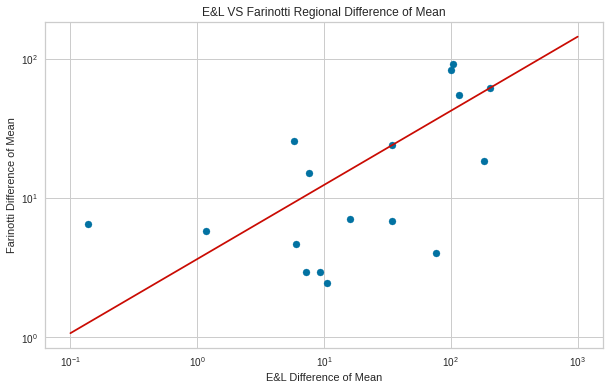

In [20]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Farinotti Difference of Mean'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')
def myExpFunc(x, a, b):
    return a * np.power(x, b)

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of Mean')
plt.xlabel('E&L Difference of Mean')

In [21]:
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Farinotti Difference of Median'])
pearsonr(x,y)

(0.8369224419579759, 2.8005052422163714e-05)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 2.4843536636753853
	b = popt[1] = 0.6755845511005556


Text(0.5, 0, 'E&L Difference of Median')

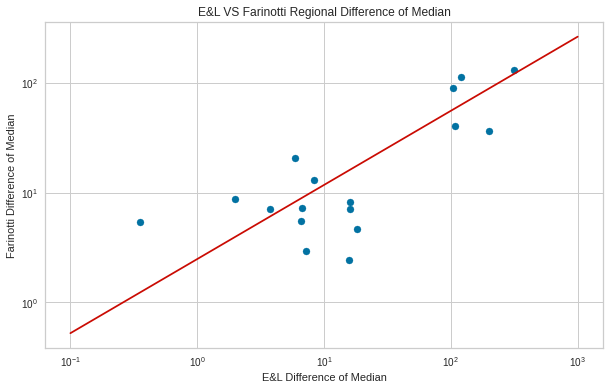

In [22]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Farinotti Difference of Median'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of Median')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of Median')
plt.xlabel('E&L Difference of Median')

In [23]:
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Farinotti Difference of STD'])
pearsonr(x,y)

(0.6780977698314995, 0.002773552869497187)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 1.6737341932526557
	b = popt[1] = 0.8080468233699477


Text(0.5, 0, 'E&L Difference of STD')

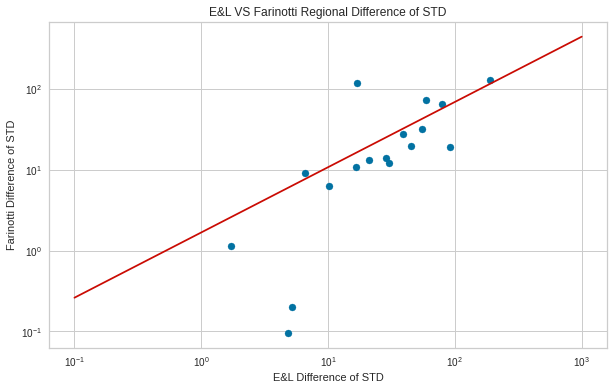

In [24]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
# plt.subplot(1,2,1)
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Farinotti Difference of STD'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'E&L VS Farinotti Regional Difference of STD')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Farinotti Difference of STD')
plt.xlabel('E&L Difference of STD')

In [25]:
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.48453030875207037, 0.04871465738751007)

In [26]:
x = abs(stats['Farinotti Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.2658710055303526, 0.3023387038061038)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 57.558373366901534
	b = popt[1] = -0.3517344792389497
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 29.962123095644955
	b = popt[1] = -0.05613868011901211


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional Mean')

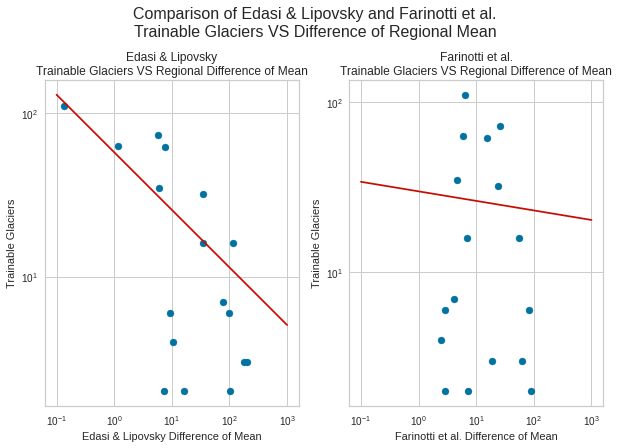

In [27]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of Mean')
x = abs(stats['Farinotti Difference of Mean'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of Mean')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of Mean')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional Mean', y = 1.05, fontsize = 16
)
# plt.tight_layout()

In [28]:
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.40349561335275397, 0.10825389095345621)

In [29]:
x = abs(stats['Farinotti Difference of Median'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.3200250571251928, 0.21048038670583463)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 52.37386616298947
	b = popt[1] = -0.27449146491072585
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 34.524464672941875
	b = popt[1] = -0.109953612939752


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional Median')

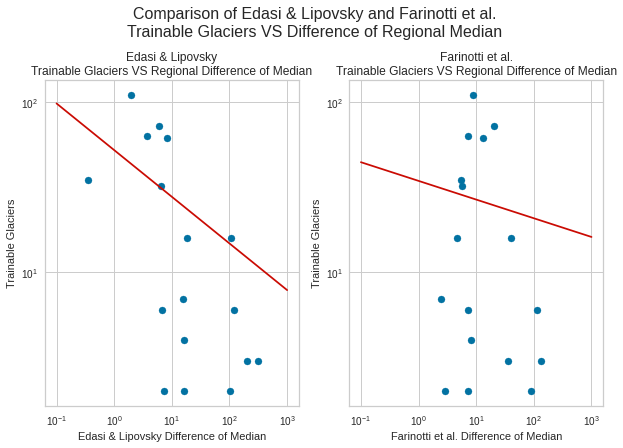

In [30]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of Median'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of Median')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of Median')
x = abs(stats['Farinotti Difference of Median'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of Median')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of Median')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional Median', y = 1.05, fontsize = 16
)
# plt.tight_layout()

In [31]:
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)


(-0.36913171666020445, 0.14480579898841492)

In [32]:
x = abs(stats['Farinotti Difference of STD'])
y = abs(stats['Trainable Glaciers'])
pearsonr(x,y)

(-0.4103849239069771, 0.10179919182822304)

Exponential Fit: y = (a*(x**b))
	a = popt[0] = 94.08149946560455
	b = popt[1] = -0.45483702963008216
Exponential Fit: y = (a*(x**b))
	a = popt[0] = 42.18867875685831
	b = popt[1] = -0.2566032627217834


Text(0.5, 1.05, 'Comparison of Edasi & Lipovsky and Farinotti et al.\nTrainable Glaciers VS Difference of Regional STD')

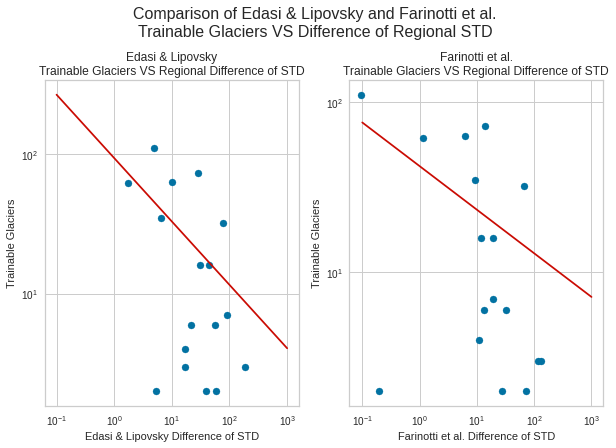

In [33]:
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
fig = plt.subplots(figsize = (10,6))
plt.subplot(1,2,1)
x = abs(stats['E&L Difference of STD'])
y = abs(stats['Trainable Glaciers'])
plt.scatter(
    x,
    y
)
plt.xscale('log')
plt.yscale('log')

newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )



# r2 = r2_score(x, y)
r2 = x.corr(y)
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

plt.title(
    'Edasi & Lipovsky\nTrainable Glaciers VS Regional Difference of STD')
# \n$R^2$ = ' + str(r2)

plt.ylabel('Trainable Glaciers')
plt.xlabel('Edasi & Lipovsky Difference of STD')
x = abs(stats['Farinotti Difference of STD'])
y = abs(stats['Trainable Glaciers'])
plt.subplot(1,2,2)
plt.scatter(
    x,
    y
)
# r2 = r2_score(x, y)
r2 = x.corr(y)

plt.xscale('log')
plt.yscale('log')
newX = np.logspace(-1, 3, base=10)

popt, pcov = curve_fit(myExpFunc, x, y)
plt.plot(newX, myExpFunc(newX, *popt), 'r-',
#          label="({0:.3f}*x**{1:.3f})".format(*popt)
        )
print("Exponential Fit: y = (a*(x**b))")
print ("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))


plt.title(
    'Farinotti et al.\nTrainable Glaciers VS Regional Difference of STD')
# \n$R^2$ = ' + str(r2)
plt.ylabel('Trainable Glaciers')
plt.xlabel('Farinotti et al. Difference of STD')
plt.suptitle(
    'Comparison of Edasi & Lipovsky and Farinotti et al.' + 
    '\nTrainable Glaciers VS Difference of Regional STD', y = 1.05, fontsize = 16
)
# plt.tight_layout()